In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import scipy.io


In [2]:
npoints = 1000
data = np.ones((npoints, npoints))
xvals = np.linspace(-50, 50, npoints)
yvals = np.linspace(-50, 50, npoints)
xvals_grid, yvals_grid = np.meshgrid(xvals, yvals)
data = np.exp(-(xvals_grid**2.+yvals_grid**2.)/50**2)

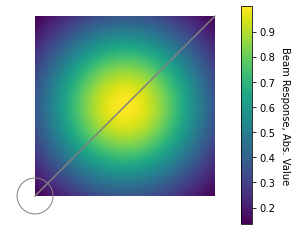

In [31]:
fig, ax = plt.subplots()
plt.imshow(data, origin='lower', interpolation='none')
plt.axis('off')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Beam Response, Abs. Value', rotation=270, labelpad=15)
plt.plot([0, 1000], [0, 1000], color='grey')
circle1 = plt.Circle((0, 0), 100, edgecolor='grey', facecolor='none')
ax.add_patch(circle1)
plt.show()

In [4]:
rad = np.sqrt(xvals_grid**2., yvals_grid**2.)
ang = np.arctan2(np.sin(yvals_grid), np.cos(xvals_grid))
ang[np.where(ang < 0.)] += 2*np.pi
ang_plot = np.linspace(0, 2.*np.pi, 1000)
rad_plot = np.linspace(.1, 50, 500)
rad_interp, ang_interp = np.meshgrid(rad_plot, ang_plot)
plot_data = griddata(
    (rad.flatten(), ang.flatten()), data.flatten(), (rad_interp, ang_interp)
)

In [16]:
ang_sort_inds = np.argsort(ang)
rad_sort_inds = np.argsort(rad)

<ipython-input-18-5f5cf5dfd7c7>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax1.pcolormesh(ang, rad, data, shading='nearest')


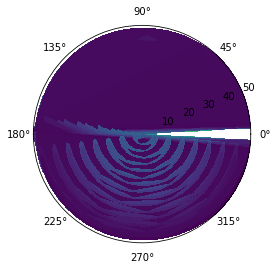

In [18]:
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(ang, rad, data, shading='nearest')
plt.show()

ValueError: cannot reshape array of size 1000000000 into shape (1,1000)

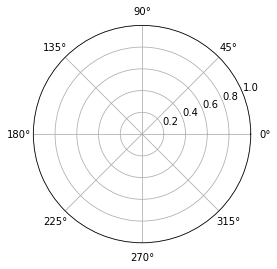

In [17]:
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(ang[ang_sort_inds], rad[rad_sort_inds], data[ang_sort_inds, rad_sort_inds], shading='nearest')
plt.show()

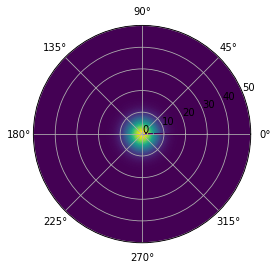

In [11]:
#create 5000 Random points distributed within the circle radius 100
max_r = 50
max_theta = 2.0 * np.pi
number_points = 5000
points = np.random.rand(number_points,2)*[max_r,max_theta]

#Some function to generate values for these points, 
#this could be values = np.random.rand(number_points)
values = np.exp(-points[:,0]**2./50.)

#now we create a grid of values, interpolated from our random sample above
theta = np.linspace(0.0, max_theta, 100)
r = np.linspace(0, max_r, 200)
grid_r, grid_theta = np.meshgrid(r, theta)
data_test = griddata(points, values, (grid_r, grid_theta), method='cubic',fill_value=0)

#Create a polar projection
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(theta,r,data_test.T, shading='nearest')
ax1.grid('True')
plt.show()

In [7]:
np.shape(r)

(200,)

In [8]:
np.shape(data)

(1000, 1000)

In [34]:
jones_path = '/Users/ruby/Astro/jones_matrix_plotting/zenith_jones.sav'
jones_struct = scipy.io.readsav(jones_path)['jones']

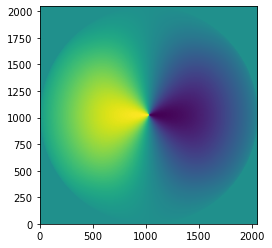

In [37]:
plt.imshow(np.real(jones_struct[0,0]), origin='lower', interpolation='none')
plt.show()

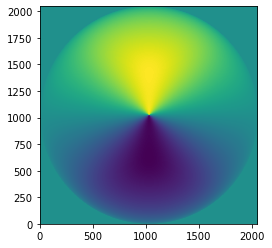

In [38]:
plt.imshow(np.real(jones_struct[0,1]), origin='lower', interpolation='none')
plt.show()

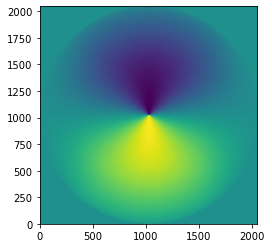

In [40]:
plt.imshow(np.real(jones_struct[1,0]), origin='lower', interpolation='none')
plt.show()

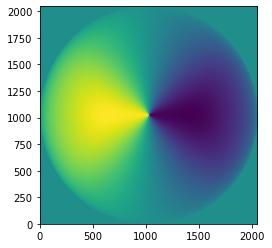

In [43]:
plt.imshow(np.real(jones_struct[1,1]), origin='lower', interpolation='none')
plt.show()

In [44]:
jones_p_amp = np.sqrt(
    np.real(jones_struct[0, 0])**2. + np.real(jones_struct[0, 1])**2.
)
jones_q_amp = np.sqrt(
    np.real(jones_struct[1, 0])**2. + np.real(jones_struct[1, 1])**2.
)

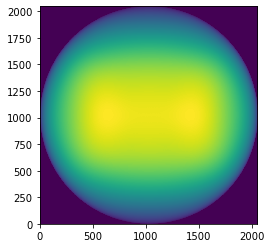

In [46]:
plt.imshow(jones_q_amp, origin='lower', interpolation='none')
plt.show()

In [47]:
dim = 2048
k_mat = np.zeros((2, 2, dim, dim))
for ind in range(2):
    k_mat[0, ind, :, :] = np.real((jones_struct[0, ind])/jones_p_amp)
    k_mat[1, ind, :, :] = np.real((jones_struct[1, ind])/jones_q_amp)

<ipython-input-47-a46a841cdd84>:4: RuntimeWarning: invalid value encountered in true_divide
  k_mat[0, ind, :, :] = np.real((jones_struct[0, ind])/jones_p_amp)
<ipython-input-47-a46a841cdd84>:5: RuntimeWarning: invalid value encountered in true_divide
  k_mat[1, ind, :, :] = np.real((jones_struct[1, ind])/jones_q_amp)


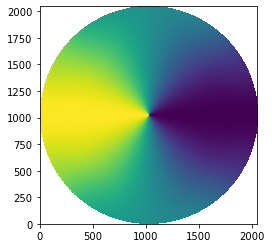

In [57]:
plt.imshow(k_mat[0,0,:,:], origin='lower', interpolation='none')
plt.show()

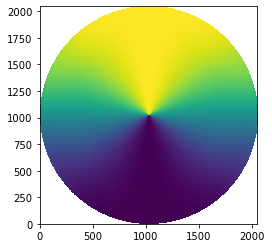

In [58]:
plt.imshow(k_mat[0,1,:,:], origin='lower', interpolation='none')
plt.show()

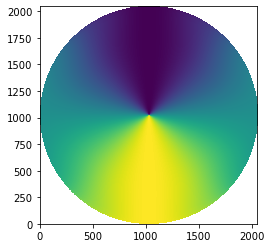

In [59]:
plt.imshow(k_mat[1,0,:,:], origin='lower', interpolation='none')
plt.show()

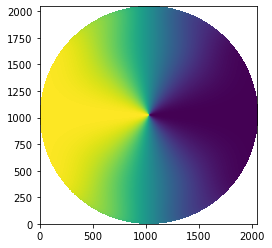

In [55]:
plt.imshow(k_mat[1,1,:,:], origin='lower', interpolation='none')
plt.show()